<h1 style="color:#1a237e; background-color:#ffeb3b; padding:10px; border-radius:5px; text-align:center;text-shadow: 2px 2px 5px rgba(0,0,0,0.5);">
Order and Sales Trend Analysis: Data Analysis & Insights
</h1>


<div style="background-color:#1e1e2f; color:white; padding:15px; border-radius:10px; font-size:16px;">
    
<h2 style="color:#ffcc00;">📦 Dataset Overview – Blinkit Sales</h2>

<p>
The <strong>Blinkit Sales Dataset</strong> consists of three interconnected tables that provide a comprehensive view of the online order lifecycle, product details, and sales transactions.
</p>

<ul>
  <li><strong>🟡 Orders:</strong> Contains key information about each customer order, such as <code>order_id</code>, <code>order_date</code>, <code>promised_delivery_time</code>, and <code>actual_delivery_time</code>.</li>
  <li><strong>🟢 Order_Items:</strong> Holds detailed data for every item in an order, including <code>product_id</code>, <code>quantity</code>, and <code>price</code>. It links to both orders and products.</li>
  <li><strong>🔵 Products:</strong> Provides product-level information such as <code>product_name</code>, <code>category</code>, and <code>price</code>.</li>
</ul>

<p>
These tables work together to support advanced sales analysis, including delivery trends, product performance, and customer purchase behavior.
</p>

</div>


<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">1.Importing Required Libraries</h1>

##### <span style="color:orange">Importing required libraries means loading external Python libraries into your script or notebook so you can use their functions and tools.

In [1]:
# 1.1-Pandas : is an open-source Python library used for data manipulation and analysis.
import pandas as pd
# 1.2-Numpy : is an open-source Python library used for scientific computing and numerical operations.
import numpy as np
# 1.3-Matplotlib : is a powerful Python library used for data visualization.
import matplotlib.pyplot as plt
# to display Matplotlib plots directly :
%matplotlib inline 
# 1.4-Seaborn : is a Python data visualization library built on top of Matplotlib.
import seaborn as sns

<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">2.Loading the Dataset</h1>

##### <span style="color:orange"> importing data from an external file (such as CSV, Excel, JSON, or SQL) into a Pandas DataFrame so it can be analyzed and processed using Python. 

In [2]:
# Orders Table
orders = pd.read_csv("blinkit_orders_clean.csv")
orders.head(2)

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534

In [3]:
# Order Items Table
order_items = pd.read_csv("cleaned_blinkit_order_items.csv")
order_items.head(2)

order_id  product_id  quantity  unit_price
0  1961864118      642612         3      517.03
1  1549769649      378676         1      881.42

In [4]:
# Products
products = pd.read_csv("cleaned_blinkit_products.csv")
products.head(2)

product_id product_name             category           brand   price  \
0      153019       Onions  Fruits & Vegetables      Aurora LLC  947.95   
1       11422     Potatoes  Fruits & Vegetables  Ramaswamy-Tata  127.16   

       mrp  margin_percentage  shelf_life_days  predicted_price  profit_margin  
0  1263.93               25.0                3       895.874928      24.999802  
1   169.55               25.0                3       131.550541      25.001474

<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">3.Combining Data</h1>

##### <span style="color:orange"> bringing together multiple datasets into one unified dataset

In [5]:
# Merges orders with order_items on order_id
df = pd.merge(order_items, orders, on='order_id', how='left')
df.head(2)

order_id  product_id  quantity  unit_price  customer_id  \
0  1961864118      642612         3      517.03     30065862   
1  1549769649      378676         1      881.42      9573071   

            order_date promised_delivery_time actual_delivery_time  \
0  2024-07-17 08:34:01    2024-07-17 08:52:01  2024-07-17 08:47:01   
1  2024-05-28 13:14:29    2024-05-28 13:25:29  2024-05-28 13:27:29   

  delivery_status  order_total payment_method  delivery_partner_id  store_id  
0         On Time      3197.07           Cash                63230      4771  
1         On Time       976.55           Cash                14983      7534

In [6]:
# Merges df with products on product_id
df = pd.merge(df, products, on='product_id', how='left')
df.head(2)

order_id  product_id  quantity  unit_price  customer_id  \
0  1961864118      642612         3      517.03     30065862   
1  1549769649      378676         1      881.42      9573071   

            order_date promised_delivery_time actual_delivery_time  \
0  2024-07-17 08:34:01    2024-07-17 08:52:01  2024-07-17 08:47:01   
1  2024-05-28 13:14:29    2024-05-28 13:25:29  2024-05-28 13:27:29   

  delivery_status  order_total  ... store_id  product_name  \
0         On Time      3197.07  ...     4771    Pet Treats   
1         On Time       976.55  ...     7534  Orange Juice   

               category         brand   price      mrp  margin_percentage  \
0              Pet Care  Pillay-Ahuja  517.03   795.43               35.0   
1  Cold Drinks & Juices  Baral-Kamdar  881.42  1259.17               30.0   

   shelf_life_days  predicted_price  profit_margin  
0              365       568.670506      34.999937  
1              180       892.550503      29.999921  

[2 rows x 22 columns]

<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">4.Exploring the Data</h1>

##### <span style="color:orange"> examining the dataset to understand its structure, quality, and key characteristics before performing analysis.

In [7]:
# Show the first 5 rows
df.head()

order_id  product_id  quantity  unit_price  customer_id  \
0  1961864118      642612         3      517.03     30065862   
1  1549769649      378676         1      881.42      9573071   
2  9185164487      741341         2      923.84     45477575   
3  9644738826      561860         1      874.78     88067569   
4  5427684290      602241         2      976.55     83298567   

            order_date promised_delivery_time actual_delivery_time  \
0  2024-07-17 08:34:01    2024-07-17 08:52:01  2024-07-17 08:47:01   
1  2024-05-28 13:14:29    2024-05-28 13:25:29  2024-05-28 13:27:29   
2  2024-09-23 13:07:12    2024-09-23 13:25:12  2024-09-23 13:29:12   
3  2023-11-24 16:16:56    2023-11-24 16:34:56  2023-11-24 16:33:56   
4  2023-11-20 05:00:39    2023-11-20 05:17:39  2023-11-20 05:18:39   

  delivery_status  order_total  ... store_id  product_name  \
0         On Time      3197.07  ...     4771    Pet Treats   
1         On Time       976.55  ...     7534  Orange Juice   
2         On Time       839.05  ...     9886          Eggs   
3         On Time       440.23  ...     7917  Orange Juice   
4         On Time      2526.68  ...     2741          Nuts   

               category         brand   price      mrp  margin_percentage  \
0              Pet Care  Pillay-Ahuja  517.03   795.43               35.0   
1  Cold Drinks & Juices  Baral-Kamdar  881.42  1259.17               30.0   
2     Dairy & Breakfast    Prasad LLC  923.84  1154.80               20.0   
3  Cold Drinks & Juices     Gupta Ltd  874.78  1249.69               30.0   
4     Snacks & Munchies      Bahl-Pau  976.55  1502.38               35.0   

   shelf_life_days  predicted_price  profit_margin  
0              365       568.670506      34.999937  
1              180       892.550503      29.999921  
2                7       819.657599      20.000000  
3              180       885.929590      30.000240  
4               90      1062.410456      34.999800  

[5 rows x 22 columns]

In [8]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   product_id              5000 non-null   int64  
 2   quantity                5000 non-null   int64  
 3   unit_price              5000 non-null   float64
 4   customer_id             5000 non-null   int64  
 5   order_date              5000 non-null   object 
 6   promised_delivery_time  5000 non-null   object 
 7   actual_delivery_time    5000 non-null   object 
 8   delivery_status         5000 non-null   object 
 9   order_total             5000 non-null   float64
 10  payment_method          5000 non-null   object 
 11  delivery_partner_id     5000 non-null   int64  
 12  store_id                5000 non-null   int64  
 13  product_name            5000 non-null   object 
 14  category                5000 non-null   

In [9]:
# Description of the data in the DataFrame
df.describe()

order_id     product_id     quantity   unit_price   customer_id  \
count  5.000000e+03    5000.000000  5000.000000  5000.000000  5.000000e+03   
mean   5.029129e+09  509974.939600     2.006800   493.157900  5.009685e+07   
std    2.863533e+09  293678.307475     0.820542   298.075647  2.919082e+07   
min    6.046500e+04    4452.000000     1.000000    12.320000  3.181300e+04   
25%    2.531421e+09  257719.000000     1.000000   227.220000  2.404314e+07   
50%    5.074378e+09  540618.000000     2.000000   448.160000  4.997808e+07   
75%    7.488579e+09  747801.000000     3.000000   781.080000  7.621215e+07   
max    9.998298e+09  993331.000000     3.000000   995.980000  9.989390e+07   

       order_total  delivery_partner_id     store_id        price  \
count   5000.00000          5000.000000  5000.000000  5000.000000   
mean    2201.86170         50050.318200  4999.689000   493.157900   
std     1303.02438         28802.276922  2886.089242   298.075647   
min       13.25000            43.000000     1.000000    12.320000   
25%     1086.21500         24928.500000  2509.250000   227.220000   
50%     2100.69000         50262.500000  4987.000000   448.160000   
75%     3156.88250         74478.250000  7500.750000   781.080000   
max     6721.46000         99968.000000  9995.000000   995.980000   

               mrp  margin_percentage  shelf_life_days  predicted_price  \
count  5000.000000        5000.000000      5000.000000      5000.000000   
mean    685.912262          27.708000       235.241600       492.182378   
std     418.232417           7.430867       151.259042       292.097111   
min      17.600000          15.000000         3.000000        25.427356   
25%     326.290000          20.000000        90.000000       241.019102   
50%     643.820000          30.000000       365.000000       462.784780   
75%    1061.660000          35.000000       365.000000       754.607824   
max    1633.320000          40.000000       365.000000      1153.860076   

       profit_margin  
count    5000.000000  
mean       27.708050  
std         7.430808  
min        14.996496  
25%        20.000204  
50%        29.999207  
75%        34.999863  
max        40.000852

<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">5.Data Cleaning</h1>

##### <span style="color:orange"> is the process of identifying and correcting errors in a dataset to improve its quality and reliability. 

In [10]:
# Backing Up Data
df_clean = df.copy()
df_clean.head(2)

order_id  product_id  quantity  unit_price  customer_id  \
0  1961864118      642612         3      517.03     30065862   
1  1549769649      378676         1      881.42      9573071   

            order_date promised_delivery_time actual_delivery_time  \
0  2024-07-17 08:34:01    2024-07-17 08:52:01  2024-07-17 08:47:01   
1  2024-05-28 13:14:29    2024-05-28 13:25:29  2024-05-28 13:27:29   

  delivery_status  order_total  ... store_id  product_name  \
0         On Time      3197.07  ...     4771    Pet Treats   
1         On Time       976.55  ...     7534  Orange Juice   

               category         brand   price      mrp  margin_percentage  \
0              Pet Care  Pillay-Ahuja  517.03   795.43               35.0   
1  Cold Drinks & Juices  Baral-Kamdar  881.42  1259.17               30.0   

   shelf_life_days  predicted_price  profit_margin  
0              365       568.670506      34.999937  
1              180       892.550503      29.999921  

[2 rows x 22 columns]

<h3 style="color:#FF6347; font-size:22px; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"">1-Data Type Conversion</h3>

##### <span style="color:orange"> Data Type Conversion refers to the process of changing the data type of a variable or column in a dataset to another type. 

<h3 style="color:#FF6347; font-size:22px;"> 1. order Date(From object  to Date Time)</h3>

In [11]:
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])

<h3 style="color:#FF6347; font-size:22px;"> 2. promised_delivery_time (From object  to Date Time)</h3>

In [12]:
df_clean['promised_delivery_time'] = pd.to_datetime(df_clean['promised_delivery_time'])

<h3 style="color:#FF6347; font-size:22px;"> 3. actual_delivery_time (From object  to Date Time)</h3>

In [13]:
df_clean['actual_delivery_time'] = pd.to_datetime(df_clean['actual_delivery_time'])

<h3 style="color:#FF6347; font-size:22px; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"">2-Creating New Useful Columns</h3>

<h5 style="color:#FF6347; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"> [Revenue] :
    <br>
$$
\text{Revenue} = (\text{Unit Price} \times \text{Quantity}) 
$$
</h4> 


In [14]:
df_clean['revenue'] = df_clean['unit_price'] * df_clean['quantity']

<h1 style="color:lightGreen; font-size:32px; font-weight:bold; background-color:#1C1C1C;padding:10px; border-radius:8px;">6.Data Visualization</h1>

<ol style="color:#FF6347; font-weight:bold; background-color:#2F2F2F; padding:20px; border-radius:5px;"><b> 
   <li><b style="color:yellow;">Which products and categories are the best sellers?</b></li>
     <br>
  <li><b style="color:yellow;">How do payment methods impact total sales?</b></li>
    <br>
    <li><b style="color:yellow;">What is the overall sales performance over time?</b></li>
    <br>
    <li><b style="color:yellow;">Which days of the week have the highest sales?</b></li>
</ol>

<h3 style="color:#FF6347; font-size:22px; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"">1-Which products and categories are the best sellers?</h3>

In [15]:
best_sellers = df_clean.groupby(['product_name', 'category']).agg(total_sales=('order_total', 'sum'),total_quantity=('quantity', 'sum')).reset_index()
best_sellers = best_sellers.sort_values(by='total_sales', ascending=False)
top_best_sellers = best_sellers.head(10)
top_best_sellers

product_name           category  total_sales  total_quantity
36      Pet Treats           Pet Care    525666.31             473
46  Toilet Cleaner     Household Care    434588.60             430
28          Lotion      Personal Care    434235.77             350
18       Dish Soap     Household Care    420875.06             397
14     Cough Syrup           Pharmacy    407824.64             373
49        Vitamins           Pharmacy    406790.72             380
1       Baby Wipes          Baby Care    394356.96             328
7         Cat Food           Pet Care    325338.65             307
39          Pulses  Grocery & Staples    311964.65             273
4            Bread  Dairy & Breakfast    297989.26             270

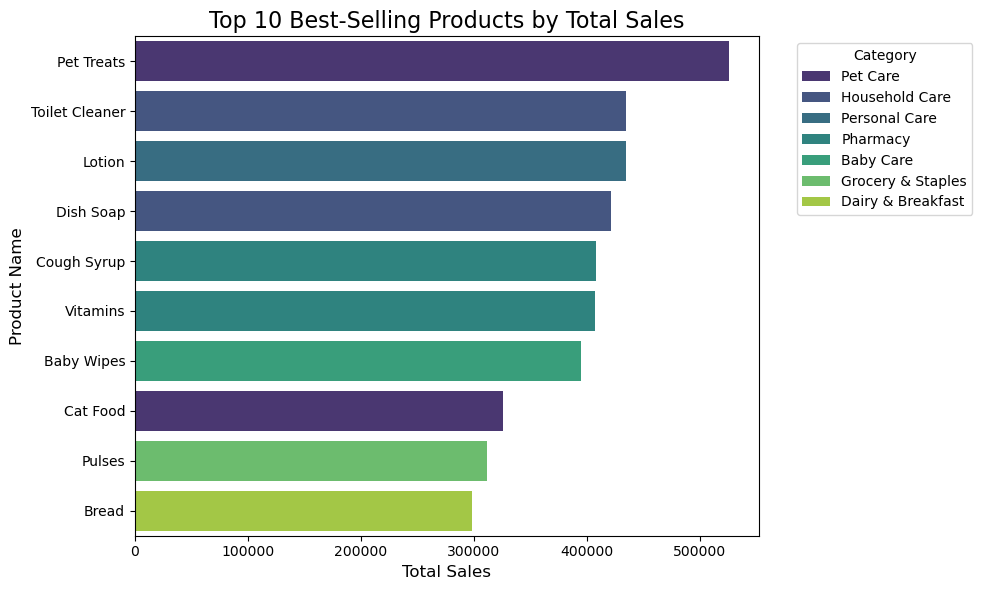

<Figure size 640x480 with 0 Axes>

In [32]:
# Create a bar plot for total sales by product  
plt.figure(figsize=(10, 6))
sns.barplot(data=top_best_sellers, x='total_sales', y='product_name', hue='category', palette='viridis')
plt.title('Top 10 Best-Selling Products by Total Sales', fontsize=16)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<h3 style="color:#FF6347; font-size:22px; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"">2-How do payment methods impact total sales?</h3>

In [17]:
payment_method_sales = df_clean.groupby('payment_method').agg(total_sales=('order_total', 'sum'),total_orders=('order_id', 'count')).reset_index()
payment_method_sales_sorted = payment_method_sales.sort_values(by='total_sales', ascending=False)
payment_method_sales_sorted

payment_method  total_sales  total_orders
0           Card   2865557.53          1285
1           Cash   2770463.99          1257
3         Wallet   2715004.27          1244
2            UPI   2658282.71          1214

C:\Users\OAMR1\AppData\Local\Temp\ipykernel_12164\3153788939.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=payment_method_sales_sorted, x='payment_method', y='total_sales', palette='Blues_d')


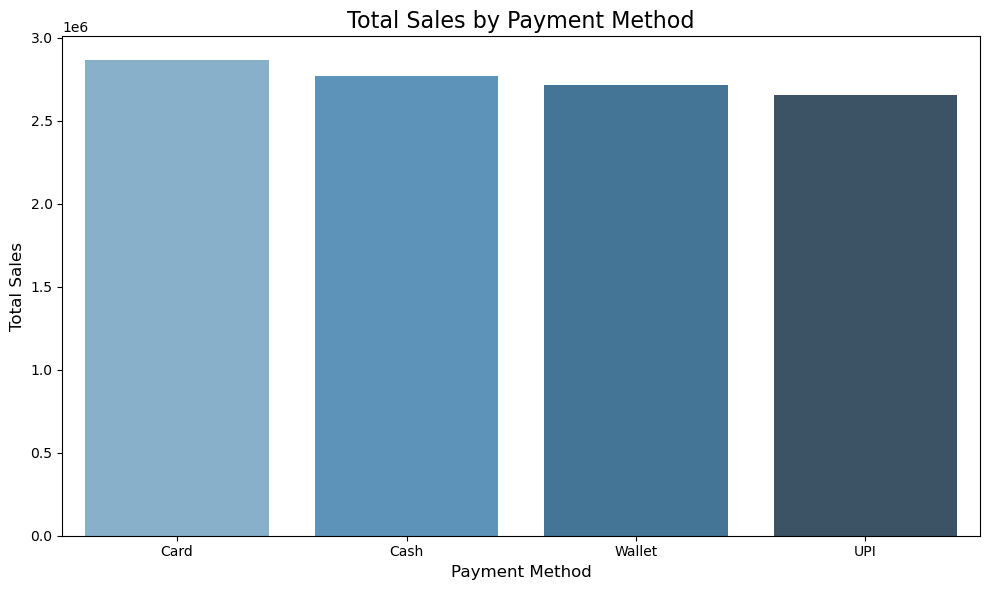

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=payment_method_sales_sorted, x='payment_method', y='total_sales', palette='Blues_d')
plt.title('Total Sales by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.tight_layout()
plt.show()
plt.savefig('chart2.png', dpi=300, bbox_inches='tight') 

<h3 style="color:#FF6347; font-size:22px; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"">3-What is the overall sales performance over time?</h3>

In [19]:
# Aggregate sales by month or day (you can choose the granularity)
df_clean['month'] = df_clean['order_date'].dt.to_period('M') 
# Group by the month and calculate total revenue
sales_per_month = df_clean.groupby('month').agg(total_revenue=('revenue', 'sum')).reset_index()
sales_per_month 

month  total_revenue
0   2023-03      110989.65
1   2023-04      249382.54
2   2023-05      269445.26
3   2023-06      233672.95
4   2023-07      237060.98
5   2023-08      303511.99
6   2023-09      277585.47
7   2023-10      263859.88
8   2023-11      261474.62
9   2023-12      253628.38
10  2024-01      273090.91
11  2024-02      260130.49
12  2024-03      240661.78
13  2024-04      215255.49
14  2024-05      264996.72
15  2024-06      239157.46
16  2024-07      252367.96
17  2024-08      251255.76
18  2024-09      231024.68
19  2024-10      255862.84
20  2024-11       27999.62

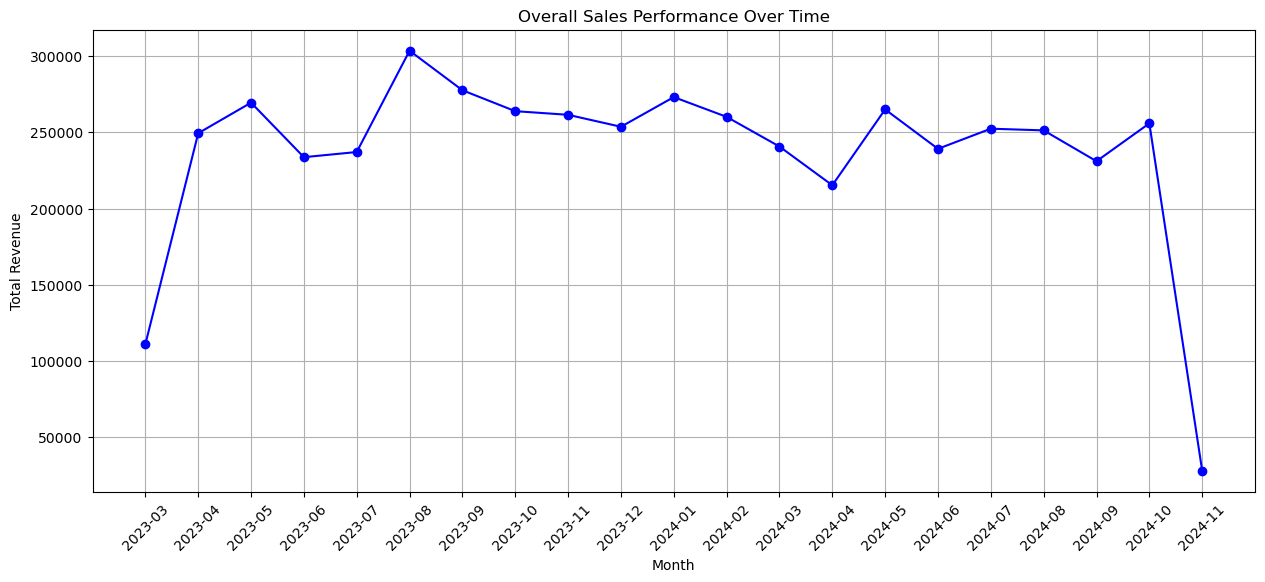

In [20]:
plt.figure(figsize=(15, 6))
plt.plot(sales_per_month['month'].astype(str), sales_per_month['total_revenue'], marker='o', color='b')
plt.title('Overall Sales Performance Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('chart3.png', dpi=300, bbox_inches='tight') 

<h3 style="color:#FF6347; font-size:22px; font-weight:bold; background-color:#2F2F2F; padding:5px; border-radius:5px;"">4-Which days of the week have the highest sales?
</h3>

In [24]:
df_clean['day_of_week'] = df_clean['order_date'].dt.day_name()
sales_by_day = df_clean.groupby('day_of_week')['revenue'].sum().reset_index()
sales_by_day = sales_by_day.sort_values('revenue', ascending=False)
sales_by_day

day_of_week    revenue
6   Wednesday  753018.67
5     Tuesday  735500.53
4    Thursday  716915.86
2    Saturday  700107.86
3      Sunday  694406.86
1      Monday  693907.44
0      Friday  678558.21

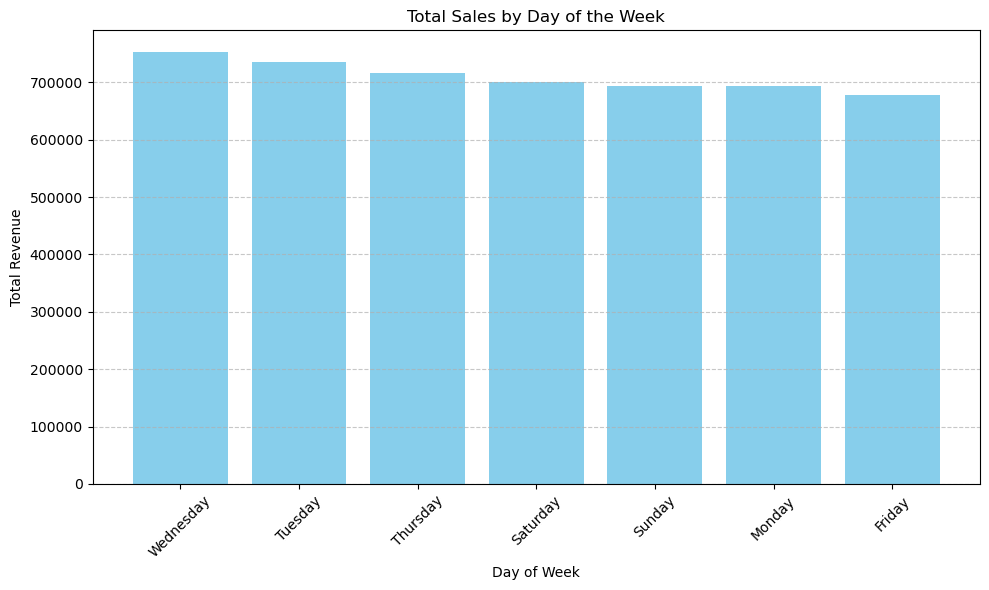

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_day['day_of_week'], sales_by_day['revenue'], color='skyblue')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.savefig('plot.png')